### RoBERTa based Spam Message Detection

In [1]:
from detector import SpamMessageDetector

#### Training roberta-spam model: to start training, set TRAIN=True, you may skip for Demo

In [2]:
TRAIN = False
if TRAIN:
    spam_detector = SpamMessageDetector("roberta-base", max_length=512, seed=0)
    train_data_path = 'spam_message_train.csv'
    val_data_path = 'spam_message_val.csv'
    spam_detector.train(train_data_path, val_data_path, num_epochs=10, batch_size=32, learning_rate=2e-5)
    model_path = 'roberta-spam'
    spam_detector.save_model(model_path)

#### Training Results

Loss    |  Accuracy      |  Precision / Recall            
:-------------------------:|:-------------------------:|:-------------------------: 
![](plots/train_validation_loss.jpg "Train / Validation Loss") Train / Validation | ![](plots/validation_accuracy.jpg "Validation Accuracy") Validation | ![](plots/validation_precision_recall.jpg "Validation Precision / Recall")  Validation





#### Evaluating the roberta-spam model

Accuracy: 0.9906
Precision: 0.9971
Recall: 0.9934
F1 Score: 0.9953


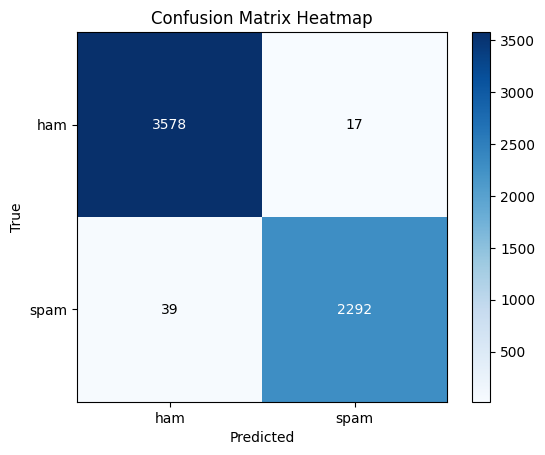

In [3]:
spam_detector = SpamMessageDetector("mshenoda/roberta-spam")
spam_detector.evaluate("data/spam_message_test.csv")

#### Testing individual example messages

In [4]:
message1 = "Hey so this sat are we going for the intro pilates only? Or the kickboxing too?"
detection = spam_detector.detect(message1)

print("\nExample 1")
print("Input Message: ", message1)
print("Detected Spam?: ", bool(detection))

message2 = "U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd."
detection = spam_detector.detect(message2)

print("\nExample 2")
print("Input Message: ", message2)
print("Detected Spam: ", bool(detection))

message3 = "Dude im no longer a pisces. Im an aquarius now."
detection = spam_detector.detect(message3)

print("\nExample 3")
print("Input Message: ", message3)
print("Detected Spam?: ", bool(detection))

message4 = "Great News! Call FREEFONE 08006344447 to claim your guaranteed $1000 CASH or $2000 gift. Speak to a live operator NOW!"
detection = spam_detector.detect(message4)

print("\nExample 4 ")
print("Input Message: ", message4)
print("Detected Spam?: ", bool(detection))


Example 1
Input Message:  Hey so this sat are we going for the intro pilates only? Or the kickboxing too?
Detected Spam?:  False

Example 2
Input Message:  U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd.
Detected Spam:  True

Example 3
Input Message:  Dude im no longer a pisces. Im an aquarius now.
Detected Spam?:  False

Example 4 
Input Message:  Great News! Call FREEFONE 08006344447 to claim your guaranteed $1000 CASH or $2000 gift. Speak to a live operator NOW!
Detected Spam?:  True


#### Batch Processing is supported for processing multiple messages at once

In [5]:
messages = [message1, message2, message3, message4]

In [6]:

detections = spam_detector.detect(messages)
for i, message in enumerate(messages):
    print("\nExample ", f"{i+1}")
    print("Input Message: ", message)
    print("detected spam: ", bool(detections[i]))



Example  1
Input Message:  Hey so this sat are we going for the intro pilates only? Or the kickboxing too?
detected spam:  False

Example  2
Input Message:  U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd.
detected spam:  True

Example  3
Input Message:  Dude im no longer a pisces. Im an aquarius now.
detected spam:  False

Example  4
Input Message:  Great News! Call FREEFONE 08006344447 to claim your guaranteed $1000 CASH or $2000 gift. Speak to a live operator NOW!
detected spam:  True
